In [193]:
from matplotlib import pyplot as plt
from scipy import stats
import numpy as np
import pandas as pd

In [194]:
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [195]:
df['age_group'] = pd.cut(df['age'], bins=3, labels=('young','middle_age','old') )
df.head()

,age,sex,bmi,children,smoker,region,charges,age_group
0,19,female,27.900,0,yes,southwest,16884.92400,young
1,18,male,33.770,1,no,southeast,1725.55230,young
2,28,male,33.000,3,no,southeast,4449.46200,young
3,33,male,22.705,0,no,northwest,21984.47061,young
4,32,male,28.880,0,no,northwest,3866.85520,young


In [196]:
# What age group has the most smokers. 
# 
df1 = df.groupby(['age_group','smoker'])['sex'].count()
df1.head(6)



age_group   smoker
young       no        412
            yes       111
middle_age  no        311
            yes        91
old         no        341
            yes        72
Name: sex, dtype: int64

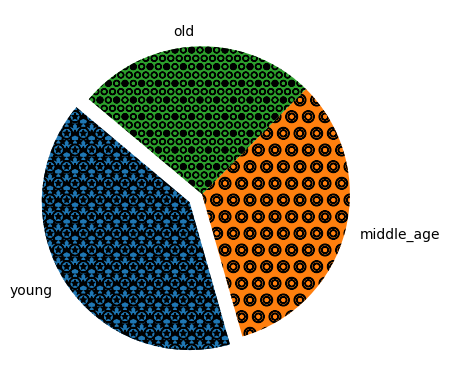

In [197]:
labels = 'young', 'middle_age', 'old', 
sizes = [111, 91, 72]
colors = ["orange", "lightcoral", "lightskyblue"]

fig, ax = plt.subplots()
ax.pie(sizes, startangle=140 , labels=labels, explode=(0.1,0,0), hatch=['**O', 'oO', 'O.O'])
plt.show()





In [198]:
# average charges for each age group with no children?
df1 = df[(df['children'] == 0)] 
df1

,age,sex,bmi,children,smoker,region,charges,age_group
0,19,female,27.900,0,yes,southwest,16884.92400,young
3,33,male,22.705,0,no,northwest,21984.47061,young
4,32,male,28.880,0,no,northwest,3866.85520,young
5,31,female,25.740,0,no,southeast,3756.62160,young
9,60,female,25.840,0,no,northwest,28923.13692,old
...,...,...,...,...,...,...,...,...
1331,23,female,33.400,0,no,southwest,10795.93733,young
1334,18,female,31.920,0,no,northeast,2205.98080,young
1335,18,female,36.850,0,no,southeast,1629.83350,young
1336,21,female,25.800,0,no,southwest,2007.94500,young


In [199]:
df2 = df1['charges'].mean()
df2


12365.97560163589

In [220]:
children_df = df.groupby(['age_group','children'])['age_group'].count()
pd.children_df

AttributeError: module 'pandas' has no attribute 'children_df'

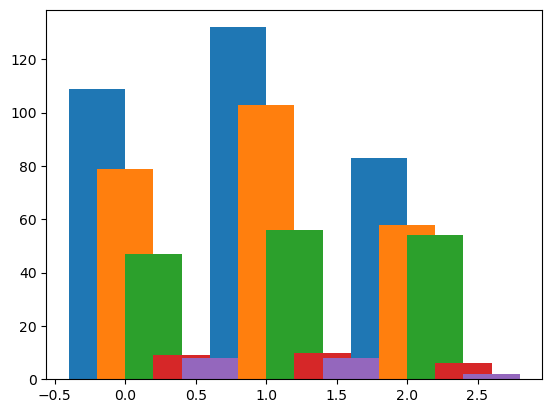

In [217]:
X = ['young','middle_age','old'] 
a = [109,132,83] 
b = [79,103,58] 
c = [47,56,54]
d = [9,10,6]
e = [8,8,2] 

X_axis = np.arange(len(X)) 

plt.bar(X_axis - 0.2, a, 0.4, label = '1') 
plt.bar(X_axis + 0, b, 0.4, label = '2') 
plt.bar(X_axis + 0.2, c, 0.4, label = '3') 
plt.bar(X_axis + 0.4, d, 0.4, label = '4') 
plt.bar(X_axis + 0.6, e, 0.4, label = '5') 
plt.show()





In [219]:
children_df.pivot(index='age_group', columns='children', values='booked').plot(kind='bar')

AttributeError: 'Series' object has no attribute 'pivot'